# U - критерий Манна-Уитни

Непараметрический критерий Манна-Уитни используется для выявления различий между двумя независимыми выборками по какому-либо определенному количественно признаку. 
Алгорит:
1) Ранжирование обоих выборок \
2) Присваивание рангов значениям выборок, если значения совпадают вычисляется среднее арифметическое\
3) Вычисляется сумма рангов по выборкам\
4) Сумма рангов выборок складывается\
5) Вычисляется эмпирическое значение критерия \
6) По табличным значениям вычисляется критическое значение\
7) Эмпирический критерий сравнивается с критическим\
8) Вывод о принятии гипотез \

Реализуем алгоритм вычисления критерия

In [22]:
import math
from scipy import stats
import numpy as np
import random
import pandas as pd
from PIL import Image
from IPython.display import Image

PATH = "/Users/daria/stepikcourse/"

In [9]:
# зададим 2 выборки 
sample1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
sample2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

In [14]:
def mannuit(sample1, sample2):
    comm_ranks = [] # объединенный список рангов первой и второй выборки 
    rank_sample_1 = [] # ранги первого списка 
    rank_sample_2 = [] # ранги второго списка 

    comm_sample = sample1 + sample2 # объединим выборки
    comm_sample.sort() # отсортируем по возрастанию

    uniq_list = list(set(comm_sample))
    uniq_list.sort()

    comm_ranks = []
    temp_list = []
    rank = 0

    for x, i in enumerate(uniq_list):
        rank = comm_sample.index(i) + 1
        num = comm_sample.count(i)
        temp_list = []

        while num != 0:
            temp_list.append(rank)
            rank = rank + 1
            num = num - 1

        rank = sum(temp_list) / comm_sample.count(i)
        comm_ranks.append(sum(temp_list) / comm_sample.count(i))

    for x, i in enumerate(sample1):
        rank_sample_1.append(comm_ranks[uniq_list.index(i)])

    for x, i in enumerate(sample2):
        rank_sample_2.append(comm_ranks[uniq_list.index(i)])

    
    return rank_sample_1, rank_sample_2

In [15]:
empirical_sum = sum(mannuit(sample1, sample2)[0]) + sum(mannuit(sample1, sample2)[1])
teoretical_sum = len(comm_sample) * (len(comm_sample) + 1) / 2

if empirical_sum == teoretical_sum:
    print('Эмпирическая сумма рангов равна теоретической сумме')
else:
    print('Эмпирическая сумма рангов НЕ равна теоретической сумме')

Эмпирическая сумма рангов равна теоретической сумме


Выдвенем гипотезы \
Н0 - выборки значимо НЕ отличаются \
Н1 - выборки значимо отличаются

Вычислим эмпирическое значение критерия Манна-Уитни

In [16]:
N1 = len(sample1) # количество элементов в первой выборке 
N2 = len(sample2) # количество элементов во второй выборке  

if len(sample1) > len(sample2):
    Nmax = len(sample1)
else:
    Nmax = len(sample2)
    
if sum(mannuit(sample1, sample2)[0]) > sum(mannuit(sample1, sample2)[1]):
    Tmax = sum(mannuit(sample1, sample2)[0])
else:
    Tmax = sum(mannuit(sample1, sample2)[1])

# Эмпирический критерий Манна-Уитни вычисляется по формуле

Uempir = N1 * N2 + (Nmax * (Nmax + 1)) / 2 - Tmax
print(f'Эмпирическое значение критерия Манна-Уитни - {Uempir}')

Эмпирическое значение критерия Манна-Уитни - 50.0


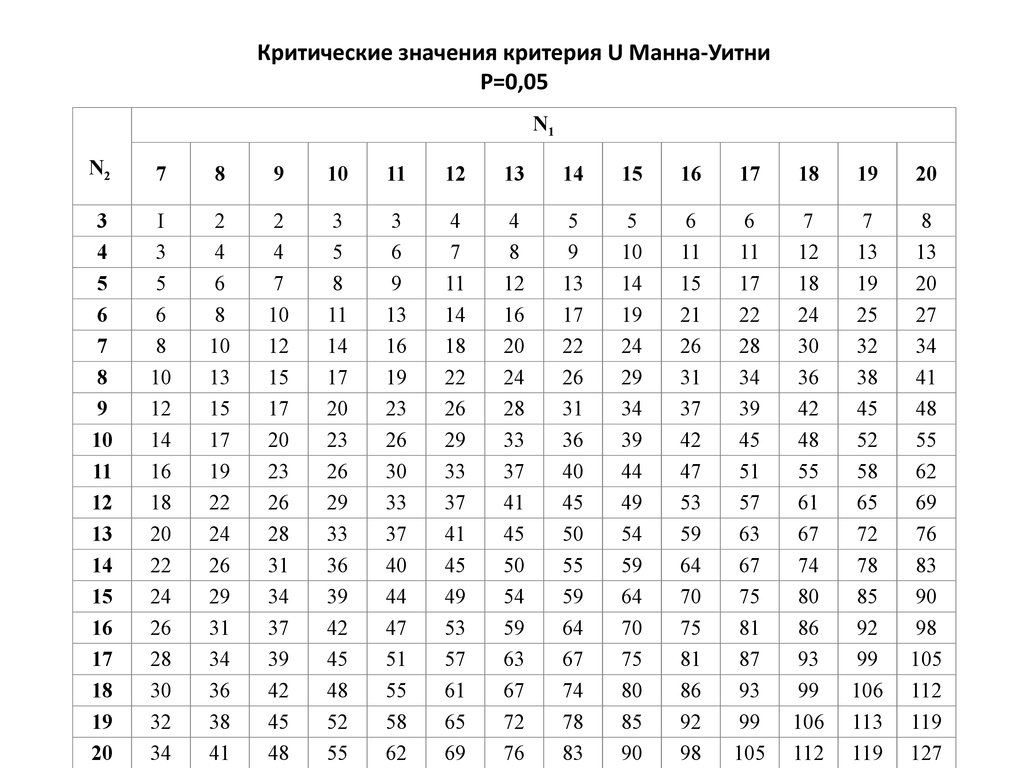

In [23]:
# по таблице определим теоретические значение критерия.
Image(filename = PATH + "slide-5.jpeg", width=800, height=800)

In [28]:
print(f'Теоретические значение критерия для выборок размера {len(sample1)} и {len(sample2)} равен 37')

Теоретические значение критерия для выборок размера 12 и 12 равен 37


In [27]:
U = 37

if Uempir > U:
    print('Принимается гипотеза Н0')
else:
    print('Принимается гипотеза Н1')

Принимается гипотеза Н0


Вычислим уровень значимости для критерия Манна-Уитни с помощью программного пакета stats

In [30]:
stat, p = stats.mannwhitneyu(sample1, sample2)
p_value = p

In [31]:
if p_value > 0.05:
    print('Принимается гипотеза Н0')
else:
    print('Принимается гипотеза Н1')

Принимается гипотеза Н0
